Primetrade.ai - Data Science internship Assignment

Importing Libraries

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

Loading Dataset

In [16]:
# from google.colab import drive

# # This command mounts your Google Drive to the /content/drive directory
# drive.mount('/content/drive')

# print("Google Drive has been mounted successfully.")

In [17]:
BASE_PATH = '/content/drive/MyDrive/ds_asifalisherani/csv_files/'

In [18]:
fear_greed = pd.read_csv(BASE_PATH + 'fear_greed_index.csv')
print(fear_greed.shape)
fear_greed.head()

(2644, 4)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [19]:
historical_df = pd.read_csv(BASE_PATH + 'historical_data.csv')
print(historical_df.shape)
historical_df.head(5)

(211224, 16)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Preprocessing

In [20]:
fear_greed['date'] = pd.to_datetime(fear_greed['date'])
fear_greed.rename(columns={'date': 'FGI_Date', 'value': 'FGI_Value', 'classification': 'FGI_Classification'}, inplace=True)
print(fear_greed.head())

    timestamp  FGI_Value FGI_Classification   FGI_Date
0  1517463000         30               Fear 2018-02-01
1  1517549400         15       Extreme Fear 2018-02-02
2  1517635800         40               Fear 2018-02-03
3  1517722200         24       Extreme Fear 2018-02-04
4  1517808600         11       Extreme Fear 2018-02-05


In [21]:
historical_df['Timestamp_UTC'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
historical_df['Trade_Date'] = historical_df['Timestamp_UTC'].dt.normalize()
historical_df = historical_df[historical_df['Closed PnL'].abs() > 0]
print(historical_df[['Timestamp IST', 'Timestamp_UTC', 'Trade_Date', 'Closed PnL']].head())

       Timestamp IST       Timestamp_UTC Trade_Date   Closed PnL
44  03-12-2024 14:39 2024-12-03 14:39:00 2024-12-03  3008.231185
45  03-12-2024 14:39 2024-12-03 14:39:00 2024-12-03    30.741534
46  03-12-2024 14:39 2024-12-03 14:39:00 2024-12-03    40.770089
47  03-12-2024 14:39 2024-12-03 14:39:00 2024-12-03   243.812267
48  03-12-2024 14:39 2024-12-03 14:39:00 2024-12-03   254.263735


Data Visualization

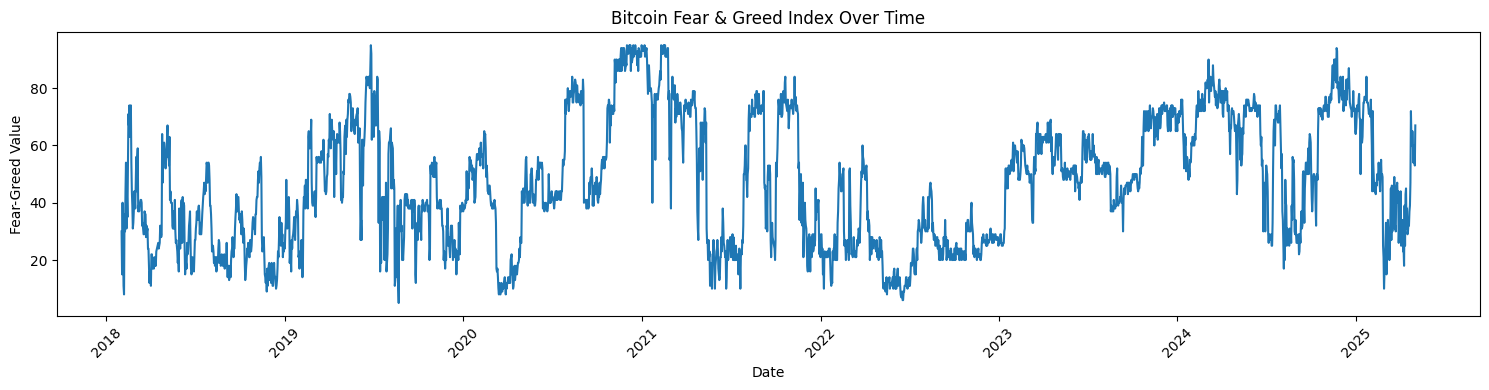

In [22]:
#Visualize the Fear & Greed Index over time

plt.figure(figsize=(15,4))
plt.plot(fear_greed['FGI_Date'], fear_greed['FGI_Value'])
plt.title("Bitcoin Fear & Greed Index Over Time")
plt.xlabel("Date")
plt.ylabel("Fear-Greed Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/ds_asifalisherani/outputs/fear_greed_trend.png')
plt.show()

In [23]:
# Mearging Datasets
merged_df = pd.merge(
    historical_df,
    fear_greed[['FGI_Date', 'FGI_Classification', 'FGI_Value']],
    left_on='Trade_Date',
    right_on='FGI_Date',
    how='left'
)
merged_df.to_csv('/content/drive/MyDrive/ds_asifalisherani/outputs/merged_trader_sentiment.csv', index=False)

In [24]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,Timestamp_UTC,Trade_Date,FGI_Date,FGI_Classification,FGI_Value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0570,2446.39,22156.95,SELL,03-12-2024 14:39,10000.498600,Sell,3008.231185,...,52200758791,True,7.754933,5.190000e+14,1.730000e+12,2024-12-03 14:39:00,2024-12-03,2024-12-03,Extreme Greed,76.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0570,25.00,226.43,SELL,03-12-2024 14:39,7554.108602,Sell,30.741534,...,52200758791,True,0.079248,3.350000e+14,1.730000e+12,2024-12-03 14:39:00,2024-12-03,2024-12-03,Extreme Greed,76.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0480,33.40,302.20,SELL,03-12-2024 14:39,7529.108602,Sell,40.770089,...,52200758791,True,0.105771,5.140000e+14,1.730000e+12,2024-12-03 14:39:00,2024-12-03,2024-12-03,Extreme Greed,76.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0464,200.00,1809.28,SELL,03-12-2024 14:39,7495.708602,Sell,243.812267,...,52200758791,True,0.633248,9.540000e+14,1.730000e+12,2024-12-03 14:39:00,2024-12-03,2024-12-03,Extreme Greed,76.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,9.0424,209.26,1892.21,SELL,03-12-2024 14:39,7295.708602,Sell,254.263735,...,52200758791,True,0.662274,7.470000e+14,1.730000e+12,2024-12-03 14:39:00,2024-12-03,2024-12-03,Extreme Greed,76.0


DATA Visualization

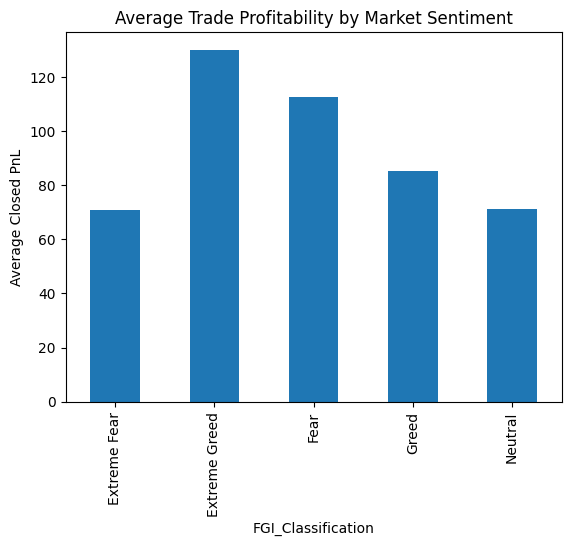

In [25]:
# Profitability by Sentiment:

profit_by_sentiment = merged_df.groupby('FGI_Classification')['Closed PnL'].mean()
profit_by_sentiment.plot(kind='bar')
plt.title('Average Trade Profitability by Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.savefig('/content/drive/MyDrive/ds_asifalisherani/outputs/profit_by_sentiment.png')
plt.show()


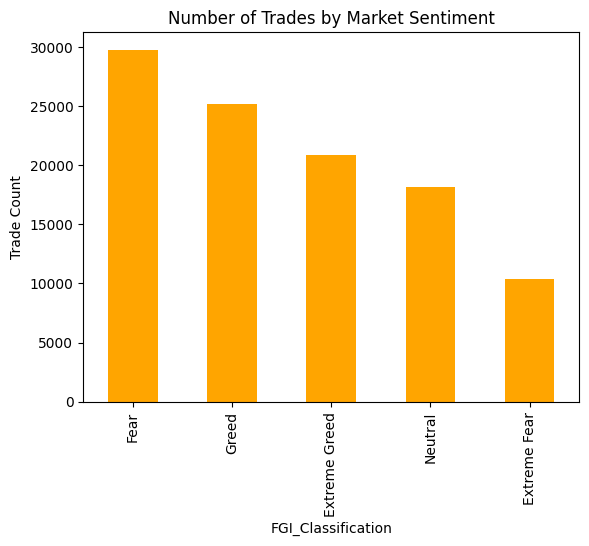

In [26]:
# Trade Volume by Sentiment

trade_counts = merged_df['FGI_Classification'].value_counts()
trade_counts.plot(kind='bar', color='orange')
plt.title('Number of Trades by Market Sentiment')
plt.ylabel('Trade Count')
plt.savefig('/content/drive/MyDrive/ds_asifalisherani/outputs/trades_by_sentiment.png')
plt.show()


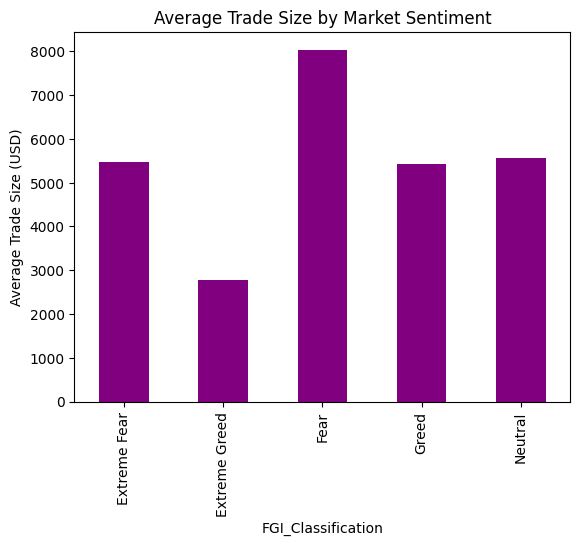

In [27]:
# Average Trade Size (USD) by Sentiment

size_by_sentiment = merged_df.groupby('FGI_Classification')['Size USD'].mean()
size_by_sentiment.plot(kind='bar', color='purple')
plt.title('Average Trade Size by Market Sentiment')
plt.ylabel('Average Trade Size (USD)')
plt.savefig('/content/drive/MyDrive/ds_asifalisherani/outputs/size_by_sentiment.png')
plt.show()

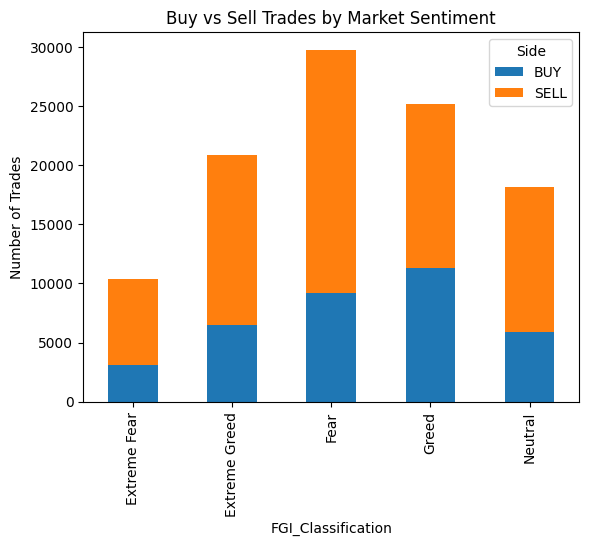

In [28]:
# Buy/Sell Behavior by Sentiment

side_by_sentiment = merged_df.groupby(['FGI_Classification', 'Side']).size().unstack().fillna(0)
side_by_sentiment.plot(kind='bar', stacked=True)
plt.title('Buy vs Sell Trades by Market Sentiment')
plt.ylabel('Number of Trades')
plt.savefig('/content/drive/MyDrive/ds_asifalisherani/outputs/Side_by_Sentiment.png')

plt.show()

END